In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('rent house.csv')
df.columns = df.columns.str.replace(' ', '')
df.head(2)

,PostedOn,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,FurnishingStatus,TenantPreferred,Bathroom,PointofContact
0,8/6/2022,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1,1/6/2022,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent


In [3]:
df['PostedOn']=pd.to_datetime(df['PostedOn'],format='%d/%m/%Y')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PostedOn          4746 non-null   datetime64[ns]
 1   BHK               4746 non-null   int64         
 2   Rent              4746 non-null   int64         
 3   Size              4746 non-null   int64         
 4   Floor             4746 non-null   object        
 5   AreaType          4746 non-null   object        
 6   AreaLocality      4746 non-null   object        
 7   City              4746 non-null   object        
 8   FurnishingStatus  4746 non-null   object        
 9   TenantPreferred   4746 non-null   object        
 10  Bathroom          4746 non-null   int64         
 11  PointofContact    4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()

PostedOn            0
BHK                 0
Rent                0
Size                0
Floor               0
AreaType            0
AreaLocality        0
City                0
FurnishingStatus    0
TenantPreferred     0
Bathroom            0
PointofContact      0
dtype: int64

In [6]:
df.duplicated().sum()

0

Available Unit in Different Cities 

In [7]:
df_city = df.City.value_counts().rename_axis('City').reset_index(name='Counts')
df_city

,City,Counts
0,Mumbai,972
1,Chennai,891
2,Bangalore,886
3,Hyderabad,868
4,Delhi,605
5,Kolkata,524


Text(0.5, 1.0, 'Available unit in different City')

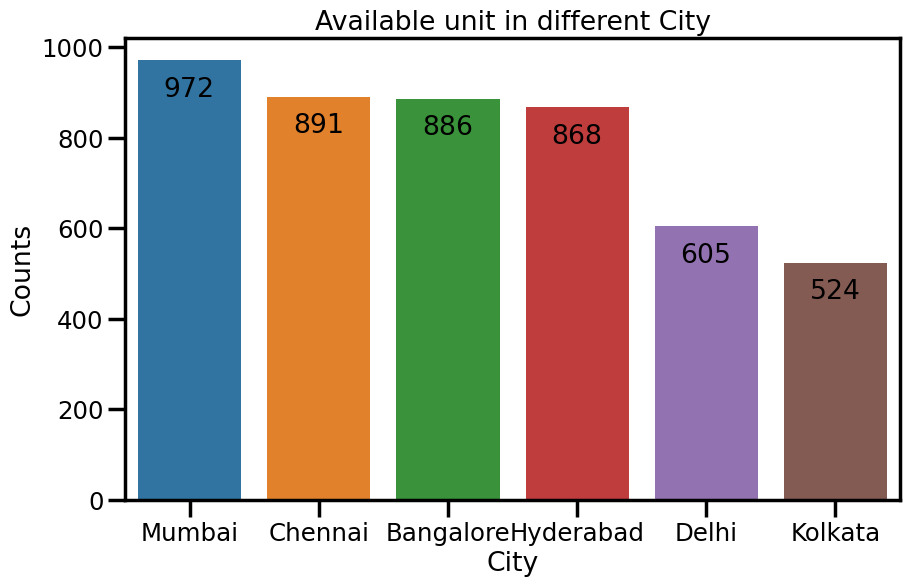

In [8]:
sns.set_context("poster", font_scale=.8)
plt.figure(figsize = (10, 6))
ax = sns.barplot(x='City',y='Counts',data=df_city)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.20, p.get_height() - 80))
plt.title('Available unit in different City')

Market Rate

In [9]:
df_avg_size = df[['City','Size']]
df_avg_size = df_avg_size.groupby(['City'])['Size'].mean().reset_index(name='Avg_size')
df_avg_size

,City,Avg_size
0,Bangalore,985.925508
1,Chennai,1031.713805
2,Delhi,786.406612
3,Hyderabad,1186.669355
4,Kolkata,787.366412
5,Mumbai,905.904321


In [10]:
df_avg_rent = df[['City','Rent']]
df_avg_rent = df_avg_rent.groupby(['City'])['Rent'].mean().round(2).reset_index(name='Avg_Rent')
df_avg_rent

,City,Avg_Rent
0,Bangalore,24966.37
1,Chennai,21614.09
2,Delhi,29461.98
3,Hyderabad,20555.05
4,Kolkata,11645.17
5,Mumbai,85321.20


In [11]:
df_perft = df_avg_size.merge(df_avg_rent,how='right')
df_perft['Avg_perft'] = df_perft['Avg_Rent'] / df_perft['Avg_size']
df_perft.sort_values(by='Avg_perft',ascending=False, inplace=True)
df_perft = df_perft.round(2)
df_perft.set_index('City',inplace=True)
df_perft

,Avg_size,Avg_Rent,Avg_perft
City,,,
Mumbai,905.90,85321.20,94.18
Delhi,786.41,29461.98,37.46
Bangalore,985.93,24966.37,25.32
Chennai,1031.71,21614.09,20.95
Hyderabad,1186.67,20555.05,17.32
Kolkata,787.37,11645.17,14.79


Text(0.5, 1.0, 'Avg Rental perft in different Cities')

<Figure size 3000x600 with 0 Axes>

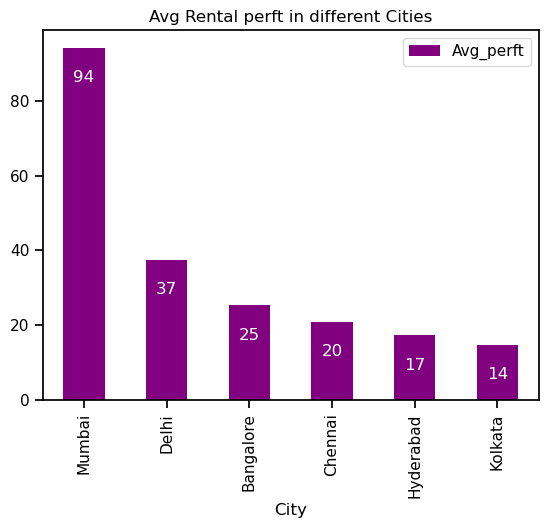

In [12]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize = (30, 6))
ax = df_perft[['Avg_perft']].plot(kind='bar',color= 'purple')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 10),
                ha ='center',
                va ='bottom',
                color = 'white')
plt.title('Avg Rental perft in different Cities')

In [13]:
df_perft = df_avg_size.merge(df_avg_rent,how='right')
df_perft['Avg_perft'] = df_perft['Avg_Rent'] / df_perft['Avg_size']
df_perft.sort_values(by='Avg_perft',ascending=False, inplace=True)
df_perft = df_perft.round(2)
df_perft.reset_index(drop=True,inplace=True)
df_perft


,City,Avg_size,Avg_Rent,Avg_perft
0,Mumbai,905.90,85321.20,94.18
1,Delhi,786.41,29461.98,37.46
2,Bangalore,985.93,24966.37,25.32
3,Chennai,1031.71,21614.09,20.95
4,Hyderabad,1186.67,20555.05,17.32
5,Kolkata,787.37,11645.17,14.79


In [14]:
df = df.merge(df_perft,how='right')
df


,PostedOn,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,FurnishingStatus,TenantPreferred,Bathroom,PointofContact,Avg_size,Avg_Rent,Avg_perft
0,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18
1,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent,905.90,85321.20,94.18
2,2022-06-23,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18
3,2022-06-27,4,700000,3200,24 out of 24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18
4,2022-07-07,4,680000,1962,18 out of 20,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent,905.90,85321.20,94.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-06-08,1,3000,350,Ground out of 3,Super Area,Belghoria,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79
4742,2022-06-05,2,2200,550,2 out of 3,Super Area,Behala silpara,Kolkata,Furnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79
4743,2022-06-20,1,2200,700,1 out of 3,Super Area,Baranagar,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79
4744,2022-05-12,1,1800,500,Ground out of 1,Super Area,Shyam Bazar,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79


In [15]:
df['Avg_Rental_perft'] = (df['Size'] * df['Avg_perft']).round(2)
df

,PostedOn,BHK,Rent,Size,Floor,AreaType,AreaLocality,City,FurnishingStatus,TenantPreferred,Bathroom,PointofContact,Avg_size,Avg_Rent,Avg_perft,Avg_Rental_perft
0,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18,470900.00
1,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent,905.90,85321.20,94.18,288567.52
2,2022-06-23,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18,301376.00
3,2022-06-27,4,700000,3200,24 out of 24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent,905.90,85321.20,94.18,301376.00
4,2022-07-07,4,680000,1962,18 out of 20,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent,905.90,85321.20,94.18,184781.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-06-08,1,3000,350,Ground out of 3,Super Area,Belghoria,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79,5176.50
4742,2022-06-05,2,2200,550,2 out of 3,Super Area,Behala silpara,Kolkata,Furnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79,8134.50
4743,2022-06-20,1,2200,700,1 out of 3,Super Area,Baranagar,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79,10353.00
4744,2022-05-12,1,1800,500,Ground out of 1,Super Area,Shyam Bazar,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,787.37,11645.17,14.79,7395.00


In [16]:
df1 = df[['City','Rent', 'Avg_Rental_perft']]
df1['High/Low_perft'] = df1['Rent'] - df1['Avg_Rental_perft']

conditions = [
    (df1['High/Low_perft'] > 0),
    (df1['High/Low_perft'] < 0) 
    ]

values = ['High', 'Low']     

df1['Result_perft'] = np.select(conditions, values)
df1['Result_perft'].value_counts()

C:\Users\Anson\AppData\Local\Temp\ipykernel_20324\3588793206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['High/Low_perft'] = df1['Rent'] - df1['Avg_Rental_perft']
C:\Users\Anson\AppData\Local\Temp\ipykernel_20324\3588793206.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Result_perft'] = np.select(conditions, values)


Low     3305
High    1441
Name: Result_perft, dtype: int64

In [17]:
df['High/Low_perft'] = df1['High/Low_perft']
df['Result_perft'] = df1['Result_perft']

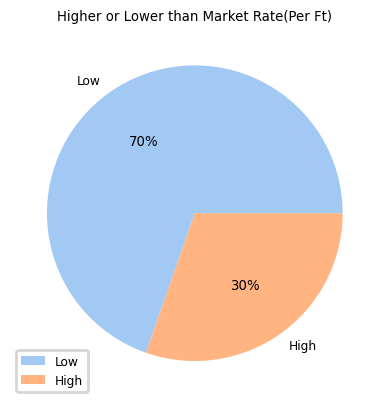

In [26]:
data = [3305 , 1441]
label = ['Low', 'High']
color = sns.color_palette('pastel')
plt.pie(data, labels=label, colors=color, autopct='%.0f%%')
plt.title('Higher & Lower than Market Rate(Per Ft)')
plt.legend(label,loc=3)
plt.show()

In [37]:
df6 = df[['City','AreaLocality','High/Low_perft']].sort_values(by='High/Low_perft',ascending=False)
df6.head(5)

,City,AreaLocality,High/Low_perft
701,Bangalore,Marathahalli,3436700.00
4662,Mumbai,Juhu,729100.00
4663,Mumbai,"Raheja Artesia, Worli",711432.48
1049,Chennai,Vettuvankeni,580097.50
4664,Mumbai,Breach Candy,548624.00


Text(0.5, 1.0, 'Top 5 higher that the market rate(Per Ft)')

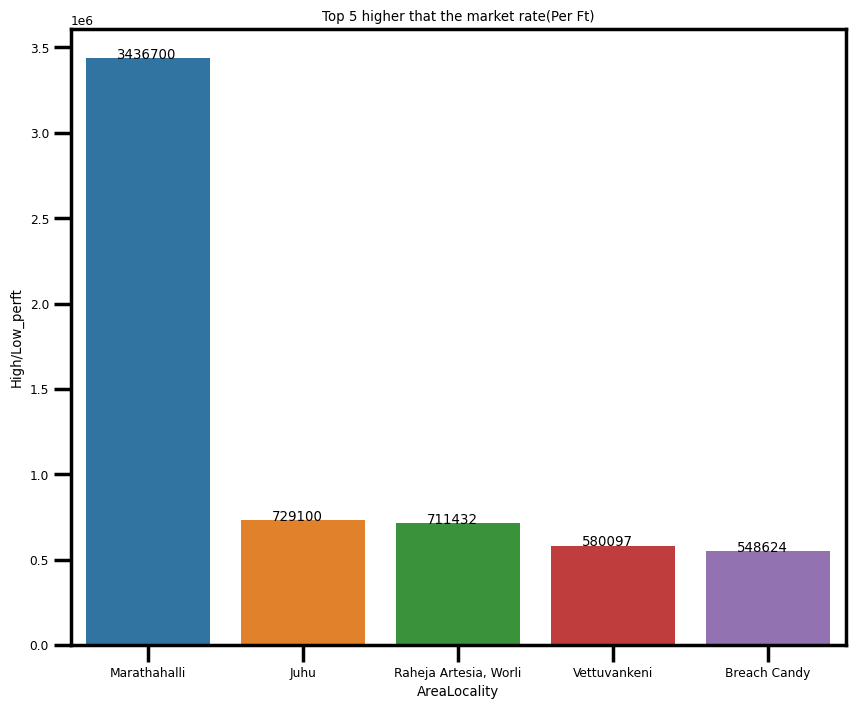

In [43]:
sns.set_context("poster", font_scale=.4)
plt.figure(figsize = (10, 8))
ax = sns.barplot(x='AreaLocality',y='High/Low_perft',data=df6.head(5))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.20, p.get_height() - 120))
plt.title('Top 5 higher that the market rate(Per Ft)')

Market Rate by BHK

In [29]:
df4 = df[['City','BHK','Rent']]
df4 = df4.groupby(['City','BHK',])['Rent'].mean().round(2).reset_index(name='Avg_rental_BHK')
df4


,City,BHK,Avg_rental_BHK
0,Bangalore,1,9368.33
1,Bangalore,2,16122.04
2,Bangalore,3,61988.58
3,Bangalore,4,113043.48
4,Chennai,1,8455.93
5,Chennai,2,15701.69
6,Chennai,3,35741.91
7,Chennai,4,96350.00
8,Chennai,5,75000.00
9,Chennai,6,170000.00


In [25]:
df = df.merge(df4,how='right')
df['High/Low_BHK'] = df['Rent'] - df['Avg_rental_BHK']

conditions = [
    (df['High/Low_BHK'] > 0),
    (df['High/Low_BHK'] < 0),
    (df['High/Low_BHK'] == 0) 
    ]

values = ['High', 'Low' , 'Maintain']     

df['Result_BHK'] = np.select(conditions, values)
df['Result_BHK'].value_counts()

Low         3076
High        1668
Maintain       2
Name: Result_BHK, dtype: int64

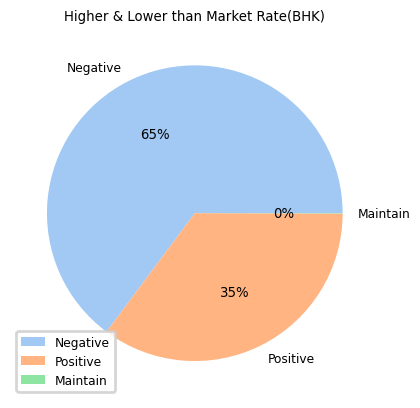

In [27]:
data = [3076 , 1668, 2 ]
label = ['Negative', 'Positive', 'Maintain']
color = sns.color_palette('pastel')
plt.pie(data, labels=label, colors=color, autopct='%.0f%%')
plt.title('Higher & Lower than Market Rate(BHK)')
plt.legend(label,loc=3)
plt.show()

In [38]:
df7 = df[['City','AreaLocality','High/Low_BHK']].sort_values(by='High/Low_BHK',ascending=False)
df7.head(5)

,City,AreaLocality,High/Low_BHK
701,Bangalore,Marathahalli,3438011.42
4662,Mumbai,Juhu,920890.41
4663,Mumbai,"Raheja Artesia, Worli",720890.41
1049,Chennai,Vettuvankeni,584298.31
4664,Mumbai,Breach Candy,570890.41


Text(0.5, 1.0, 'Top 5 higher that the market rate(BHK)')

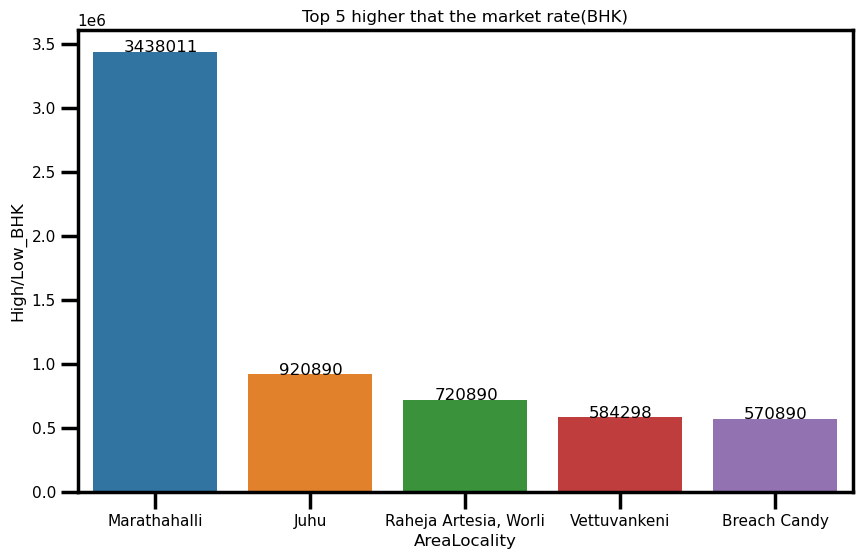

In [41]:
sns.set_context("poster", font_scale=.5)
plt.figure(figsize = (10, 6))
ax = sns.barplot(x='AreaLocality',y='High/Low_BHK',data=df7.head(5))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.20, p.get_height() - 200))
plt.title('Top 5 higher that the market rate(BHK)')